In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest # for Kolmogorov-Smirnov test
from scipy.stats import f_oneway # for ANOVA test
from scipy.stats import chi2_contingency # for Chi-square test
import itertools # for combinations 
import plotly.graph_objects as go

In [113]:
# load dataset unified
df = pd.read_csv('../data/ech_annonces_unified_68.csv',sep=';')

In [114]:
df.head(5)

,idannonce,type_annonceur,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,prix_bien,prix_maison,...,REG,DEP,type_transaction,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,prix_m2_vente
0,immo-facile-52417007,pr,m,l,0,116,NaN,5,1250,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ag672097-382986683,pr,a,l,3,44,NaN,3,600,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ag672097-383464082,pr,a,l,1,53,NaN,2,498,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ag680864-383044166,pr,a,l,0,41,NaN,2,460,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ag672097-380998252,pr,a,l,2,74,NaN,4,695,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39439 entries, 0 to 39438
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idannonce                39439 non-null  object 
 1   type_annonceur           39439 non-null  object 
 2   typedebien               39439 non-null  object 
 3   typedetransaction        39439 non-null  object 
 4   etage                    39439 non-null  int64  
 5   surface                  39439 non-null  int64  
 6   surface_terrain          11951 non-null  float64
 7   nb_pieces                39439 non-null  int64  
 8   prix_bien                39439 non-null  int64  
 9   prix_maison              437 non-null    float64
 10  prix_terrain             437 non-null    float64
 11  mensualiteFinance        39439 non-null  int64  
 12  balcon                   39439 non-null  int64  
 13  eau                      39439 non-null  int64  
 14  bain                  

In [116]:
df.shape

(39439, 60)

In [117]:
# Percentage of missing values per column
df.isna().mean()*100

idannonce                   0.000000
type_annonceur              0.000000
typedebien                  0.000000
typedetransaction           0.000000
etage                       0.000000
surface                     0.000000
surface_terrain            69.697508
nb_pieces                   0.000000
prix_bien                   0.000000
prix_maison                98.891960
prix_terrain               98.891960
mensualiteFinance           0.000000
balcon                      0.000000
eau                         0.000000
bain                        0.000000
dpeL                        0.000000
dpeC                       34.113441
mapCoordonneesLatitude      0.000000
mapCoordonneesLongitude     0.000000
annonce_exclusive           0.000000
nb_etages                  45.510789
parking                    99.931540
places_parking             63.865717
cave                       53.741221
exposition                  0.000000
ges_class                  26.113745
annee_construction         70.250260
n

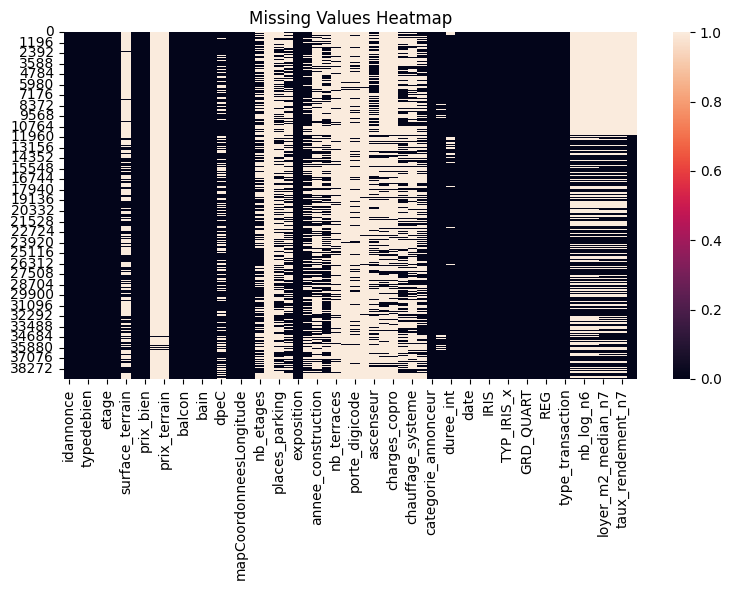

In [118]:
# Visualize missing values heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=True)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [119]:
# Columns with more than 40% missing values
df.loc[:,df.isna().mean()*100 > 40].columns

Index(['surface_terrain', 'prix_maison', 'prix_terrain', 'nb_etages',
       'parking', 'places_parking', 'cave', 'annee_construction',
       'nb_toilettes', 'nb_terraces', 'videophone', 'porte_digicode',
       'surface_balcon', 'ascenseur', 'nb_logements_copro', 'charges_copro',
       'chauffage_energie', 'chauffage_systeme', 'chauffage_mode',
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7'],
      dtype='object')

In [120]:
# Display the sum of duplicated 
df.duplicated().sum()

0

In [121]:
# Select numerical variables
var_num = df.select_dtypes(include=['int', 'float'])
# Select categorical variables
var_cat = df.select_dtypes(include=['object','category'])

In [ ]:
importimorti#loiiiKKK

Index(['etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
       'prix_maison', 'prix_terrain', 'mensualiteFinance', 'balcon', 'eau',
       'bain', 'dpeC', 'mapCoordonneesLatitude', 'mapCoordonneesLongitude',
       'nb_etages', 'places_parking', 'annee_construction', 'nb_toilettes',
       'nb_terraces', 'surface_balcon', 'nb_logements_copro', 'charges_copro',
       'duree_int', 'INSEE_COM', 'IRIS', 'CODE_IRIS', 'GRD_QUART', 'UU2010',
       'REG', 'DEP', 'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7',
       'prix_m2_vente'],
      dtype='object')

Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'dpeL', 'annonce_exclusive', 'parking', 'cave', 'exposition',
       'ges_class', 'videophone', 'porte_digicode', 'ascenseur',
       'chauffage_energie', 'chauffage_systeme', 'chauffage_mode',
       'categorie_annonceur', 'logement_neuf', 'typedebien_lite', 'date',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'type_transaction'],
      dtype='object')

(39439, 60)

In [123]:
df['type_annonceur'].value_counts()

type_annonceur
pr    39332
pa      107
Name: count, dtype: int64

In [124]:
df['typedebien'].value_counts()

typedebien
a     23835
m     14309
mn      650
an      640
l         5
Name: count, dtype: int64

# Data Quality

## Investigate the target variable 'prix_m2_vente'


In [125]:
# investigate the target variable 'prix_m2_vente'
df_investigate = df[['typedebien' , 'prix_bien' , 'prix_maison' , 'prix_terrain' , 'surface' , 'surface_terrain','prix_m2_vente']]
df_investigate.dropna()


,typedebien,prix_bien,prix_maison,prix_terrain,surface,surface_terrain,prix_m2_vente
34275,mn,420000,261380.0,158620.0,120,721.0,3500.00
34318,mn,444880,308880.0,136000.0,138,523.0,3223.77
34325,mn,298500,200500.0,98000.0,100,400.0,2985.00
34326,mn,349500,233700.0,115800.0,130,495.0,2688.46
34336,mn,442680,296680.0,146000.0,130,601.0,3405.23
...,...,...,...,...,...,...,...
36640,mn,186400,117400.0,69000.0,88,525.0,2118.18
36646,mn,235500,149500.0,86000.0,132,598.0,1784.09
36660,mn,435000,240000.0,195000.0,122,1030.0,3565.57
36694,mn,229900,229899.0,1.0,90,344.0,2554.44


In [126]:
# display the dataset with unique values of 'typedebien'
for typedebien in df_investigate['typedebien'].unique():
    print(f"\n{'='*50}")
    print(f"Type de Bien: {typedebien}")
    print(f"{'='*50}")
    display(df_investigate[df_investigate['typedebien'] == typedebien].head(10))
    print(f"Count: {len(df_investigate[df_investigate['typedebien'] == typedebien])}")



Type de Bien: m


,typedebien,prix_bien,prix_maison,prix_terrain,surface,surface_terrain,prix_m2_vente
0,m,1250,NaN,NaN,116,NaN,NaN
32,m,1030,NaN,NaN,100,NaN,NaN
70,m,1130,NaN,NaN,120,NaN,NaN
76,m,1950,NaN,NaN,146,NaN,NaN
77,m,750,NaN,NaN,65,NaN,NaN
92,m,2400,NaN,NaN,121,320.0,NaN
93,m,1400,NaN,NaN,85,NaN,NaN
100,m,1800,NaN,NaN,165,NaN,NaN
120,m,1080,NaN,NaN,110,534.0,NaN
155,m,1500,NaN,NaN,187,2259.0,NaN


Count: 14309

Type de Bien: a


,typedebien,prix_bien,prix_maison,prix_terrain,surface,surface_terrain,prix_m2_vente
1,a,600,NaN,NaN,44,NaN,NaN
2,a,498,NaN,NaN,53,NaN,NaN
3,a,460,NaN,NaN,41,NaN,NaN
4,a,695,NaN,NaN,74,NaN,NaN
5,a,900,NaN,NaN,102,NaN,NaN
6,a,700,NaN,NaN,70,NaN,NaN
7,a,680,NaN,NaN,68,NaN,NaN
8,a,755,NaN,NaN,65,NaN,NaN
9,a,995,NaN,NaN,84,NaN,NaN
10,a,500,NaN,NaN,50,NaN,NaN


Count: 23835

Type de Bien: l


,typedebien,prix_bien,prix_maison,prix_terrain,surface,surface_terrain,prix_m2_vente
8421,l,500,NaN,NaN,50,NaN,NaN
11562,l,1500,NaN,NaN,155,NaN,NaN
11672,l,910,NaN,NaN,180,NaN,NaN
11673,l,910,NaN,NaN,125,NaN,NaN
39088,l,217000,NaN,NaN,58,NaN,3741.38


Count: 5

Type de Bien: an


,typedebien,prix_bien,prix_maison,prix_terrain,surface,surface_terrain,prix_m2_vente
11887,an,396500,NaN,NaN,66,NaN,6007.58
11918,an,253000,NaN,NaN,85,NaN,2976.47
12747,an,258000,NaN,NaN,70,NaN,3685.71
12857,an,261900,NaN,NaN,66,NaN,3968.18
12891,an,244000,NaN,NaN,69,NaN,3536.23
12939,an,238000,NaN,NaN,68,NaN,3500.00
12982,an,190000,NaN,NaN,69,NaN,2753.62
12998,an,256500,NaN,NaN,88,NaN,2914.77
13213,an,267150,NaN,NaN,86,NaN,3106.40
13294,an,247250,NaN,NaN,86,NaN,2875.00


Count: 640

Type de Bien: mn


,typedebien,prix_bien,prix_maison,prix_terrain,surface,surface_terrain,prix_m2_vente
34253,mn,262100,NaN,NaN,100,400.0,2621.00
34254,mn,275100,NaN,NaN,98,400.0,2807.14
34255,mn,378784,NaN,NaN,133,700.0,2848.00
34256,mn,289568,NaN,NaN,95,428.0,3048.08
34257,mn,343428,NaN,NaN,103,700.0,3334.25
34259,mn,352932,NaN,NaN,100,734.0,3529.32
34260,mn,422932,NaN,NaN,125,734.0,3383.46
34266,mn,227250,NaN,NaN,98,498.0,2318.88
34269,mn,316800,NaN,NaN,110,1041.0,2880.00
34275,mn,420000,261380.0,158620.0,120,721.0,3500.00


Count: 650


In [127]:
# Conclusion: The target variable 'prix_m2_vente' we can calculate based on the 'prix_bien' and 'surface' 
# More we can fill missing values in 'prix_m2_vente' using this calculation

#df['prix_m2_vente_calc'] = df['prix_bien'] / df['surface']